In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-demand-forecasting/train.csv
/kaggle/input/food-demand-forecasting/meal_info.csv
/kaggle/input/food-demand-forecasting/fulfilment_center_info.csv
/kaggle/input/food-demand-forecasting/test.csv
/kaggle/input/food-demand-forecasting/sample_submission.csv


In [4]:
##Training & Testing Dataset
train = pd.read_csv('/kaggle/input/food-demand-forecasting/train.csv')
test = pd.read_csv('/kaggle/input/food-demand-forecasting/test.csv')
fullfil_center = pd.read_csv('/kaggle/input/food-demand-forecasting/fulfilment_center_info.csv')
meal_info = pd.read_csv('/kaggle/input/food-demand-forecasting/meal_info.csv')

In [5]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
fullfil_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [28]:
data = pd.merge(train, fullfil_center, on='center_id')

In [29]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [68]:
data.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
456543,1271326,145,61,1543,484.09,484.09,0,0,68,473,77,TYPE_A,4.5
456544,1062036,145,61,2304,482.09,482.09,0,0,42,473,77,TYPE_A,4.5
456545,1110849,145,61,2664,237.68,321.07,0,0,501,473,77,TYPE_A,4.5
456546,1147725,145,61,2569,243.50,313.34,0,0,729,473,77,TYPE_A,4.5
456547,1361984,145,61,2490,292.03,290.03,0,0,162,473,77,TYPE_A,4.5


In [30]:
all_data = pd.merge(data, meal_info, on='meal_id')

In [31]:
all_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [22]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [32]:
all_data.shape

(456548, 15)

In [23]:
test.shape

(32573, 8)

In [33]:
##Statistical Summary of data
all_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [25]:
test.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000


In [34]:
##Information of training data
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [36]:
##Checking Null values
all_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

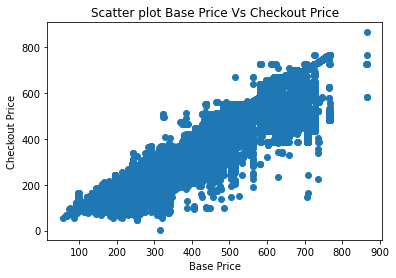

In [37]:
##EDA
import matplotlib.pyplot as plt
plt.scatter(all_data['base_price'], all_data['checkout_price'])
plt.title('Scatter plot Base Price Vs Checkout Price')
plt.xlabel('Base Price')
plt.ylabel('Checkout Price')
plt.show()

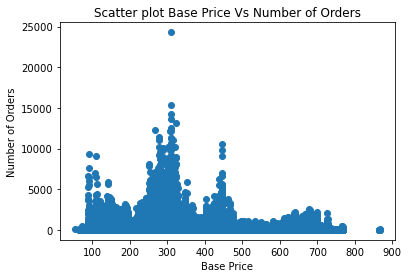

In [38]:
plt.scatter(all_data['base_price'], all_data['num_orders'])
plt.title('Scatter plot Base Price Vs Number of Orders')
plt.xlabel('Base Price')
plt.ylabel('Number of Orders')
plt.show()

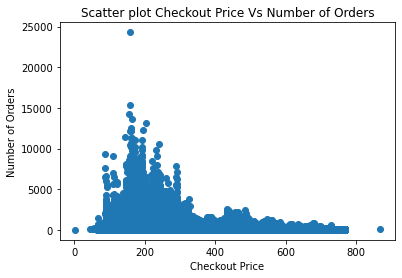

In [39]:
plt.scatter(all_data['checkout_price'], all_data['num_orders'])
plt.title('Scatter plot Checkout Price Vs Number of Orders')
plt.xlabel('Checkout Price')
plt.ylabel('Number of Orders')
plt.show()

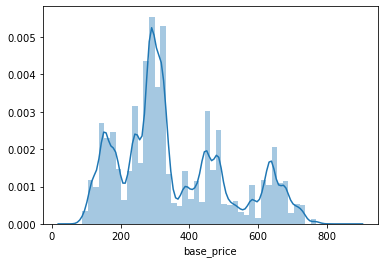

In [40]:
##Distribution Plot
import seaborn as sns
sns.distplot(all_data['base_price'])

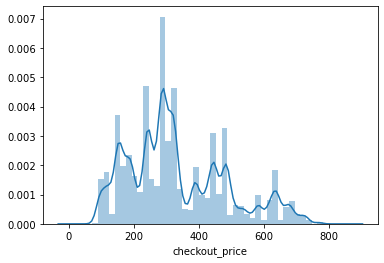

In [41]:
sns.distplot(all_data['checkout_price'])

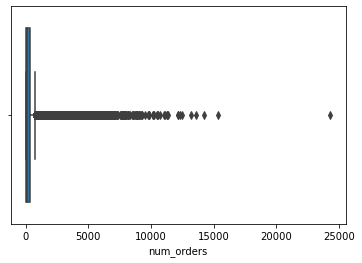

In [42]:
sns.boxplot(all_data['num_orders'])

## Correlation

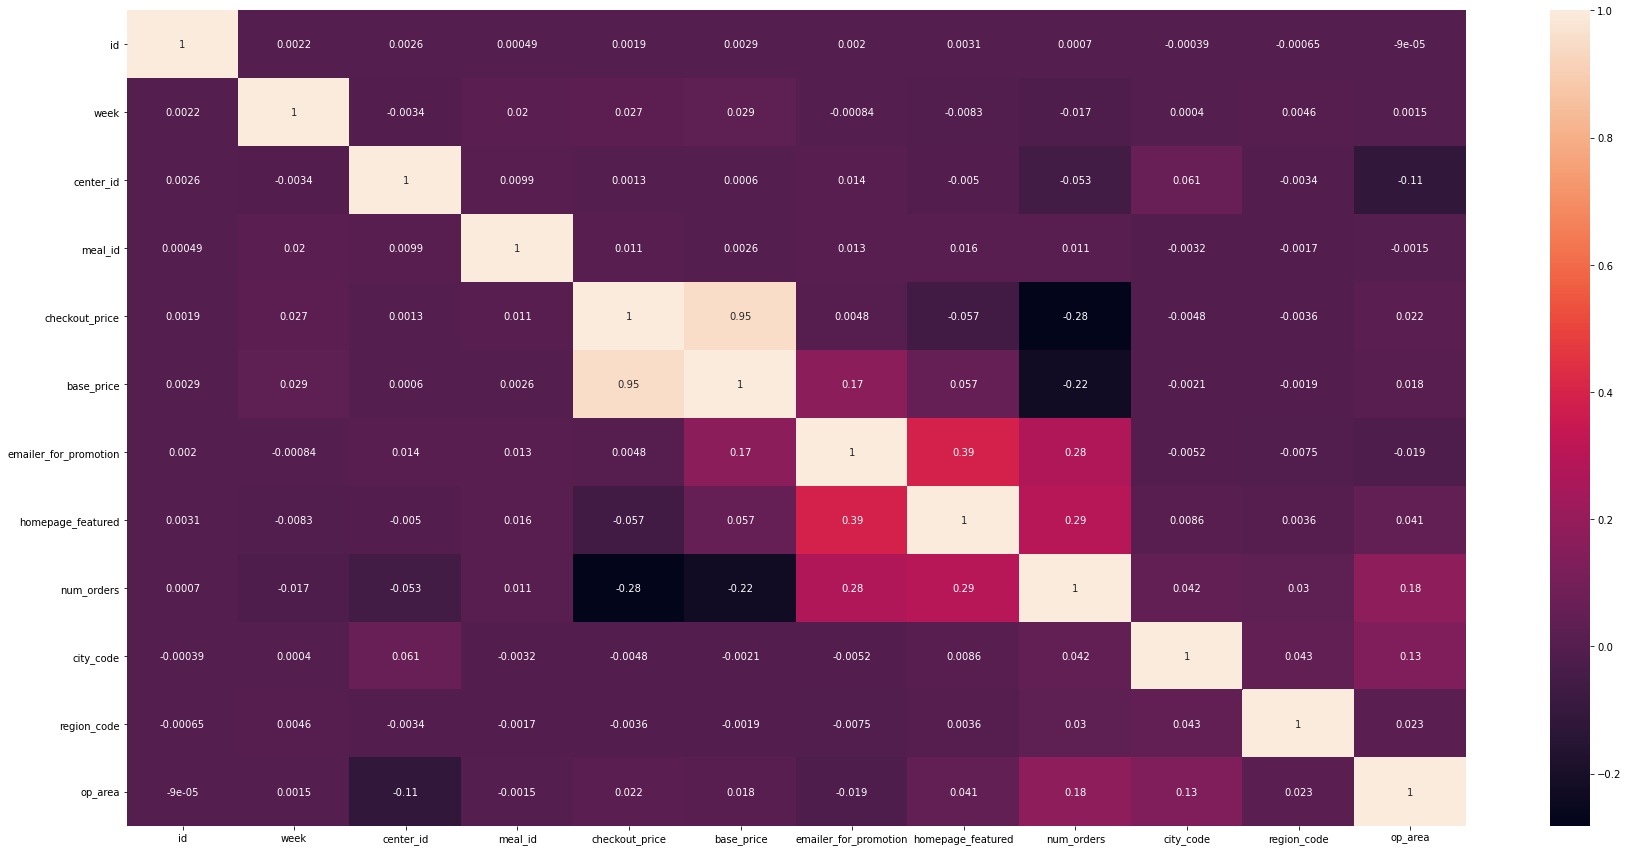

In [43]:
##Correlation Plot
import seaborn as sns
plt.figure(figsize=(30,15))
correlation = all_data.corr()
sns.heatmap(correlation, annot=True)

In [50]:
data_cp = all_data.copy()
data_cp.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [52]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

lb_enc = LabelEncoder()
data_cp["make_Cent_type"] = lb_enc.fit_transform(data_cp["center_type"])
data_cp[["center_type", "make_Cent_type"]].head(10)

,center_type,make_Cent_type
0,TYPE_C,2
1,TYPE_C,2
2,TYPE_C,2
3,TYPE_C,2
4,TYPE_C,2
5,TYPE_C,2
6,TYPE_C,2
7,TYPE_C,2
8,TYPE_C,2
9,TYPE_C,2


In [53]:
data_cp["make_category"] = lb_enc.fit_transform(data_cp["category"])
data_cp[["category", "make_category"]].head(10)

,category,make_category
0,Beverages,0
1,Beverages,0
2,Beverages,0
3,Beverages,0
4,Beverages,0
5,Beverages,0
6,Beverages,0
7,Beverages,0
8,Beverages,0
9,Beverages,0


In [54]:
data_cp["make_cuisine"] = lb_enc.fit_transform(data_cp["cuisine"])
data_cp[["cuisine", "make_cuisine"]].head(10)

,cuisine,make_cuisine
0,Thai,3
1,Thai,3
2,Thai,3
3,Thai,3
4,Thai,3
5,Thai,3
6,Thai,3
7,Thai,3
8,Thai,3
9,Thai,3


In [56]:
cp_data = data_cp.drop(['center_type','category','cuisine'], axis=1)

In [57]:
cp_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,make_Cent_type,make_category,make_cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,2.0,2,0,3
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,2.0,2,0,3
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,2.0,2,0,3
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,2.0,2,0,3
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,2.0,2,0,3


## Training and Testing Dataset

In [58]:
##Traning and Testing data spliting
X = cp_data.drop('num_orders', axis=1)
y = cp_data['num_orders']

In [59]:
y.shape

(456548,)

In [60]:
X.shape

(456548, 14)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Linear Regression

In [62]:
###Linear Regression Model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [63]:
print('Coefficient of model :', lin_reg_model.coef_)

Coefficient of model : [ 5.65080466e-07 -7.45886143e-02 -3.38072237e-01  6.57078626e-04
 -4.63225195e-01 -6.91706540e-01  2.96204376e+02  2.67179351e+02
  1.14845093e-01  6.00763917e-01  6.23176120e+01 -3.67060858e+00
  1.38674761e+01 -6.74602190e+01]


In [64]:
print('Intercept of model :',lin_reg_model.intercept_)

Intercept of model : 315.75974312009316


In [65]:
# Root Mean Squared Error on training dataset
predict_train = lin_reg_model.predict(X_train)
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)


RMSE on train dataset :  343.0286943353464


In [66]:
## prediction on test data splitting from metadata
predict_test = lin_reg_model.predict(X_test)
rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


RMSE on test dataset :  346.3963446295481


In [74]:
# ## prediction on test data
# predict_test = lin_reg_model.predict(test)
# rmse_test = mean_squared_error(test.id,predict_test)**(0.5)
# print('\nRMSE on test dataset : ', rmse_test)

## Decision Tree Regressor

In [69]:
dec_reg_model = DecisionTreeRegressor(random_state=1)
dec_reg_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [70]:
## prediction on test data spliting of metadata
x_pred_dec = dec_reg_model.predict(X_test)
print("Mean Squared Log Error is ", mean_squared_log_error(y_test, x_pred_dec))

Mean Squared Log Error is  0.4290060203787443


In [71]:
print("Root Mean Squared Error is ", mean_squared_error(y_test, x_pred_dec)**(0.5))

Root Mean Squared Error is  231.53815704733262


In [73]:
# ## prediction on test data
# x_pred_dec = dec_reg_model.predict(test)
# print("Mean Squared Log Error is ", mean_squared_log_error(test.id, x_pred_dec))

In [ ]:
# print("Root Mean Squared Error is ", mean_squared_error(test.id, x_pred_dec)**(0.5))

## Random Forest Regressor

In [ ]:
##RandomForest Regressor
ran_reg_model = RandomForestRegressor(random_state=1)
ran_reg_model.fit(X_train, y_train)

In [ ]:
## prediction on test data splitting from metadata
x_pred_ran = ran_reg_model.predict(X_test)
print("Mean Squared Log Error is ", mean_squared_log_error(y_test, x_pred_ran))

In [ ]:
print("Root Mean Squared Error is ", mean_squared_error(y_test, x_pred_ran)**(0.5))

In [ ]:
# ## prediction on test data
# x_pred_ran = ran_reg_model.predict(test)
# print("Mean Squared Log Error is ", mean_squared_log_error(test.id, x_pred_ran))

In [ ]:
# ## prediction on test data
# x_pred_ran = ran_reg_model.predict(test)
# print("Root Mean Squared Error is ", mean_squared_error(test.id, x_pred_ran)**(0.5))

In [ ]:
##File creation for submission
final_out = pd.DataFrame({'id': test.id,'num_orders': x_pred_dec})
final_out.to_csv('submission.csv', index=False)